In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import logging
import music21
from scraper import *
from collections import Counter 
from midi_analysis_helper import *

# Getting Bach Chorales from Music21 Corpus


In [4]:
info358 = {'title': 'Wenn wir in höchsten Nöten sein',
 'bwv': 431,
 'kalmus': 358,
 'baerenreiter': 68,
 'budapest': 358,
 'riemenschneider': 68,
 'notes': None}

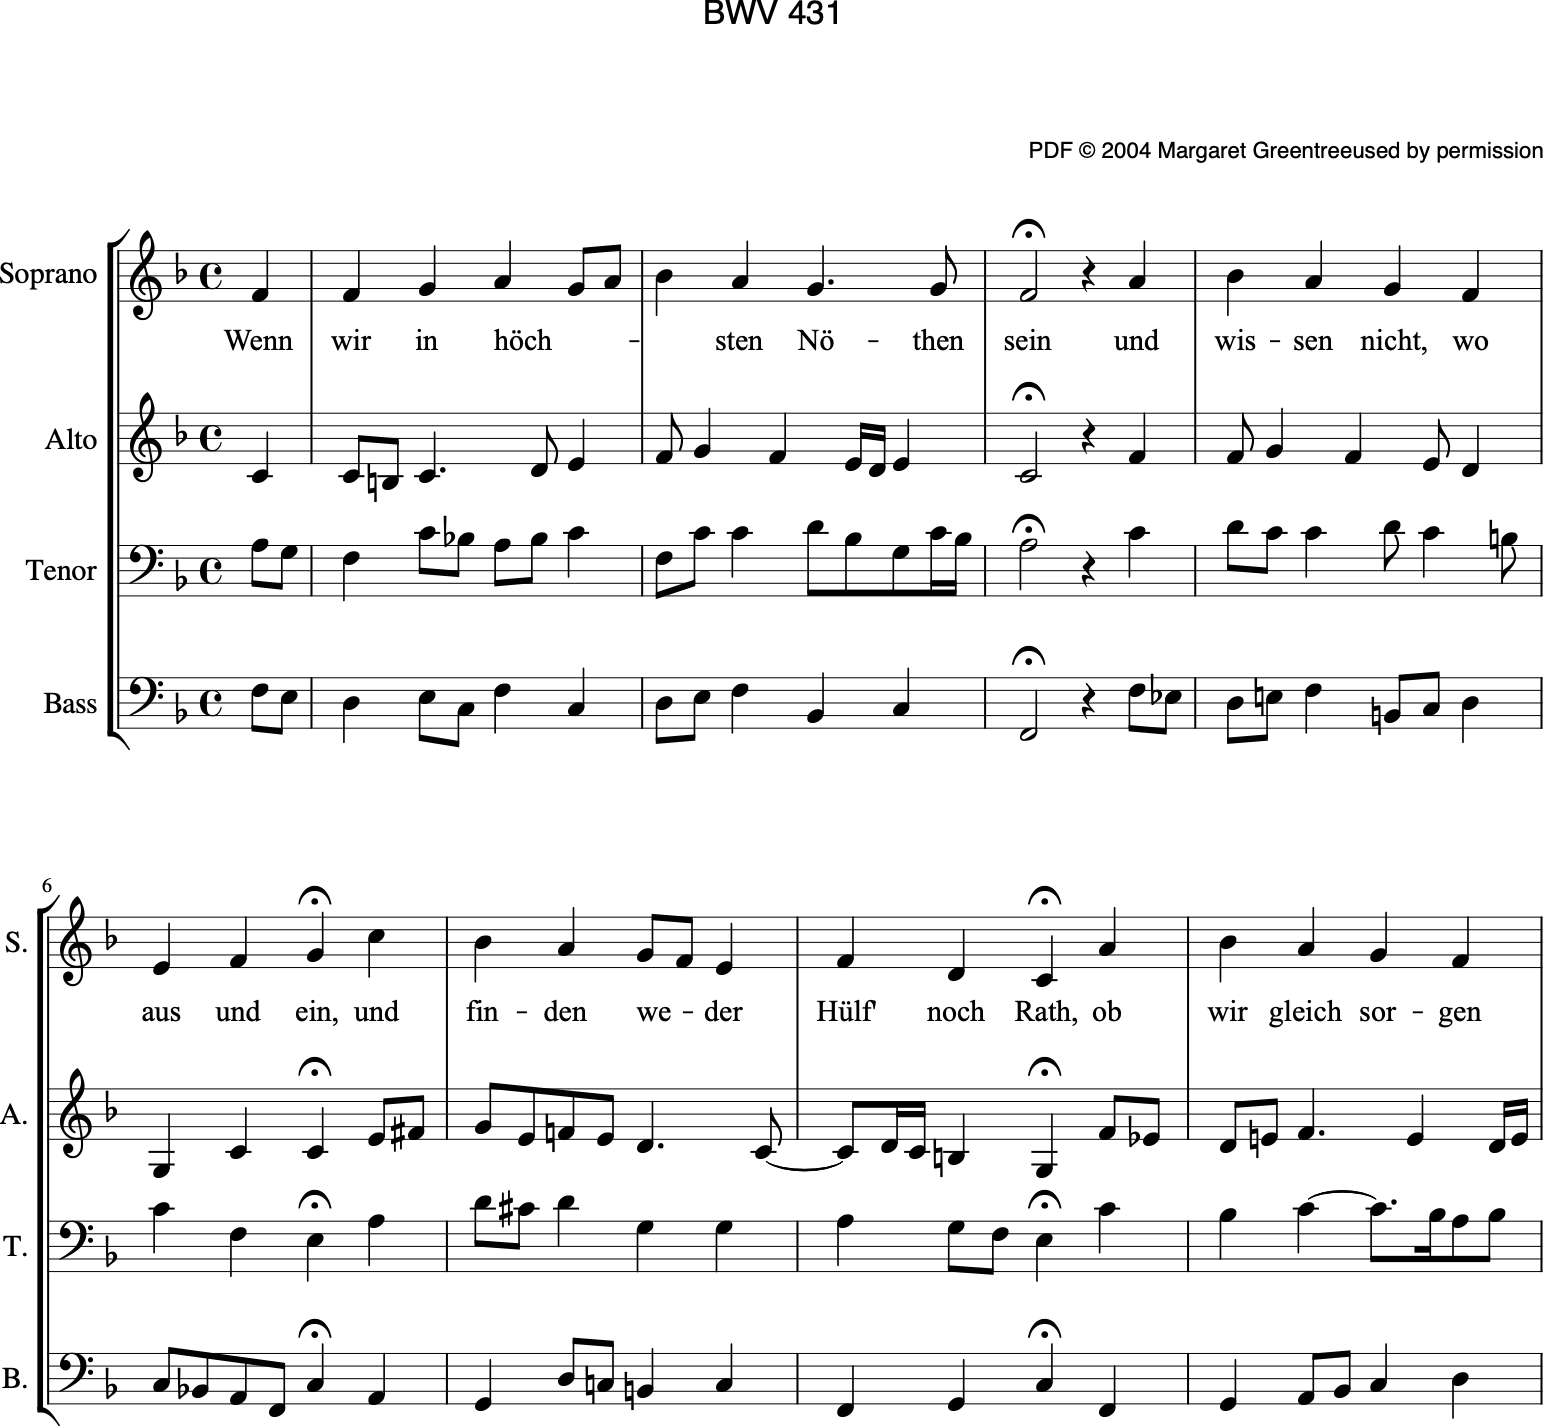

In [5]:
c = music21.corpus.parse('bach/bwv' + str(info358['bwv']))
c.show()  # shows Bach BWV431


In [6]:
def get_parts_dict_from_score(score):
    parts = get_parts(score)
    parts_dict = get_parts_dict(parts)
    return parts_dict


In [7]:
parts_dict = get_parts_dict_from_score(c)

all_measures = get_all_measures(parts_dict)
measure_notes = get_notes_by_measure(parts_dict)

In [8]:
def get_all_measures(parts_dict: dict):
    """
        returns a reorganized parts_dict, such that it is a list of each measure,
        and each measure is a dict with the measure number and that measure's data

        Params: a dictionary where each key is an instrument name
        Returns: a list of dicts
    """

    all_measures = []
    for key, value in parts_dict.items():
        measure_dict = {}
        measures = value.elements
        for measure in measures:
            try:
                measure_number = measure.measureNumber
                measure_dict[measure_number] = measure.elements
            except:
                print('error in get_all_measures')
        parts_dict[key] = measure_dict
        all_measures.append(measure_dict)
    return all_measures

In [23]:
measure_dict_notes = remove_rests_from_measure_dict(measure_notes)

In [24]:
test_measure = measure_dict_notes[1]
most_frequent(test_measure)

['C', 'F', 'A']

In [25]:
measure_chord_dict = get_measure_triad(measure_dict_notes)

['F', 'C', 'A']
['C', 'F', 'A']
['B-', 'G', 'F']
['F', 'A', 'C']
['D', 'F', 'C']
['C', 'E', 'F']
['G', 'D', 'E']
['F', 'C', 'G']
['B-', 'A', 'D']


In [26]:

c1 = music21.chord.Chord(measure_chord_dict[3])
c1.pitchedCommonName 


'F-major triad'

In [27]:
add_chord_name(measure_chord_dict)

{0: [['F', 'C', 'A'], 'F-major triad'],
 1: [['C', 'F', 'A'], 'F-major triad'],
 2: [['B-', 'G', 'F'], 'G-incomplete minor-seventh chord'],
 3: [['F', 'A', 'C'], 'F-major triad'],
 4: [['D', 'F', 'C'], 'D-incomplete minor-seventh chord'],
 5: [['C', 'E', 'F'], 'F-incomplete major-seventh chord'],
 6: [['G', 'D', 'E'], 'E-incomplete minor-seventh chord'],
 7: [['F', 'C', 'G'], 'F-quartal trichord'],
 8: [['B-', 'A', 'D'], 'Bb-incomplete major-seventh chord']}

In [28]:
measure_chord_dict

{0: [['F', 'C', 'A'], 'F-major triad'],
 1: [['C', 'F', 'A'], 'F-major triad'],
 2: [['B-', 'G', 'F'], 'G-incomplete minor-seventh chord'],
 3: [['F', 'A', 'C'], 'F-major triad'],
 4: [['D', 'F', 'C'], 'D-incomplete minor-seventh chord'],
 5: [['C', 'E', 'F'], 'F-incomplete major-seventh chord'],
 6: [['G', 'D', 'E'], 'E-incomplete minor-seventh chord'],
 7: [['F', 'C', 'G'], 'F-quartal trichord'],
 8: [['B-', 'A', 'D'], 'Bb-incomplete major-seventh chord']}

In [29]:
df_test = pd.DataFrame.from_dict(measure_chord_dict)

In [30]:
df_test.swapaxes('index', 'columns')

0                                  1
0   [F, C, A]                      F-major triad
1   [C, F, A]                      F-major triad
2  [B-, G, F]   G-incomplete minor-seventh chord
3   [F, A, C]                      F-major triad
4   [D, F, C]   D-incomplete minor-seventh chord
5   [C, E, F]   F-incomplete major-seventh chord
6   [G, D, E]   E-incomplete minor-seventh chord
7   [F, C, G]                 F-quartal trichord
8  [B-, A, D]  Bb-incomplete major-seventh chord

In [31]:
bach_scores = music21.corpus.getComposer('bach')

In [32]:

bach_scores = [music21.converter.parse(piece) for piece in bach_scores]

In [33]:
len(bach_scores)

433

In [34]:
palestrina_scores = music21.corpus.getComposer('palestrina')

In [35]:
palestrina_scores = [music21.converter.parse(piece) for piece in palestrina_scores]

In [36]:
len(palestrina_scores)

1318

In [37]:
test_bach = bach_scores[97]

In [38]:
process_score_vertically(test_bach)


[]
['E', 'G', 'B']
['E', 'B', 'A']
['G', 'D', 'A']
['B', 'F#', 'C']
['B', 'E', 'G']
['E', 'G', 'B']
['E', 'G', 'B']
['E', 'B', 'A']
['G', 'D', 'A']
['B', 'F#', 'C']
['B', 'E', 'G']
['E', 'G', 'B']
['E', 'G', 'B']
['G', 'D', 'A']
['G', 'D', 'A']
['E', 'C#', 'F#']
['B', 'E', 'G']
['E', 'F#', 'A']


{0: [[], None],
 1: [['E', 'G', 'B'], 'E-minor triad'],
 2: [['E', 'B', 'A'], 'A-quartal trichord'],
 3: [['G', 'D', 'A'], 'G-quartal trichord'],
 4: [['B', 'F#', 'C'], 'B-tritone-fourth'],
 5: [['B', 'E', 'G'], 'E-minor triad'],
 6: [['E', 'G', 'B'], 'E-minor triad'],
 7: [['E', 'G', 'B'], 'E-minor triad'],
 8: [['E', 'B', 'A'], 'A-quartal trichord'],
 9: [['G', 'D', 'A'], 'G-quartal trichord'],
 10: [['B', 'F#', 'C'], 'B-tritone-fourth'],
 11: [['B', 'E', 'G'], 'E-minor triad'],
 12: [['E', 'G', 'B'], 'E-minor triad'],
 13: [['E', 'G', 'B'], 'E-minor triad'],
 14: [['G', 'D', 'A'], 'G-quartal trichord'],
 15: [['G', 'D', 'A'], 'G-quartal trichord'],
 16: [['E', 'C#', 'F#'], 'F#-incomplete dominant-seventh chord'],
 17: [['B', 'E', 'G'], 'E-minor triad'],
 18: [['E', 'F#', 'A'], 'F#-incomplete minor-seventh chord']}

In [39]:
test_palestrina = palestrina_scores[0]
print(test_palestrina)

<music21.stream.Score 0xa314174e0>


In [40]:
test_meas=parts_dict['Soprano 1'][5]

KeyError: 'Soprano 1'

In [41]:
test_meas[4].beatDuration

NameError: name 'test_meas' is not defined

In [42]:
for note in test_meas:
    if isinstance(note, music21.note.Note):
        print(note.beatDuration)

NameError: name 'test_meas' is not defined

In [263]:
def get_col_name_from_note(note, measure, beat):
    """
        returns the column name that would correspond to this notes attributes
        to be used in the dataframe
        
        params: note, as str representation of name, measure int, and beat, int
        returns: a concatenated string of the three names
    """
    return note + 'm' + str(measure) + 'beat' + str(beat)

def generate_all_note_columns():
    """
        generates a list of column names for all 12 notes for all 4 beats in all 7 measures
        appends the composer column at the end
        
        returns list of strings in the {notename}m{meas_num}b{beat} format
    """  
    all_columns = []
    note_list = ['A', 'A-', 'G', 'G-', 'F', 'E', 'E-', 'D', 'D-', 'C', 'B', 'B-']
    for measure in range(-7,1):
        for beat in range(1, 5):
            for note in note_list:
                col_name = get_col_name_from_note(note, measure, beat)
                all_columns.append(col_name)
    all_columns.append('slurs')
    all_columns.append('composer')
    return all_columns

all_columns = generate_all_note_columns()

In [216]:
all_columns

['Am-7beat1',
 'A-m-7beat1',
 'Gm-7beat1',
 'G-m-7beat1',
 'Fm-7beat1',
 'Em-7beat1',
 'E-m-7beat1',
 'Dm-7beat1',
 'D-m-7beat1',
 'Cm-7beat1',
 'Bm-7beat1',
 'B-m-7beat1',
 'Am-7beat2',
 'A-m-7beat2',
 'Gm-7beat2',
 'G-m-7beat2',
 'Fm-7beat2',
 'Em-7beat2',
 'E-m-7beat2',
 'Dm-7beat2',
 'D-m-7beat2',
 'Cm-7beat2',
 'Bm-7beat2',
 'B-m-7beat2',
 'Am-7beat3',
 'A-m-7beat3',
 'Gm-7beat3',
 'G-m-7beat3',
 'Fm-7beat3',
 'Em-7beat3',
 'E-m-7beat3',
 'Dm-7beat3',
 'D-m-7beat3',
 'Cm-7beat3',
 'Bm-7beat3',
 'B-m-7beat3',
 'Am-7beat4',
 'A-m-7beat4',
 'Gm-7beat4',
 'G-m-7beat4',
 'Fm-7beat4',
 'Em-7beat4',
 'E-m-7beat4',
 'Dm-7beat4',
 'D-m-7beat4',
 'Cm-7beat4',
 'Bm-7beat4',
 'B-m-7beat4',
 'Am-6beat1',
 'A-m-6beat1',
 'Gm-6beat1',
 'G-m-6beat1',
 'Fm-6beat1',
 'Em-6beat1',
 'E-m-6beat1',
 'Dm-6beat1',
 'D-m-6beat1',
 'Cm-6beat1',
 'Bm-6beat1',
 'B-m-6beat1',
 'Am-6beat2',
 'A-m-6beat2',
 'Gm-6beat2',
 'G-m-6beat2',
 'Fm-6beat2',
 'Em-6beat2',
 'E-m-6beat2',
 'Dm-6beat2',
 'D-m-6beat2',
 'Cm-

In [217]:
def reset_df():
    composer_df = pd.DataFrame(columns=all_columns)
    return composer_df.reset_index()

In [164]:
reset_df()

Empty DataFrame
Columns: [index, Am-8beat1, A-m-8beat1, Gm-8beat1, G-m-8beat1, Fm-8beat1, Em-8beat1, E-m-8beat1, Dm-8beat1, D-m-8beat1, Cm-8beat1, Bm-8beat1, B-m-8beat1, Am-8beat2, A-m-8beat2, Gm-8beat2, G-m-8beat2, Fm-8beat2, Em-8beat2, E-m-8beat2, Dm-8beat2, D-m-8beat2, Cm-8beat2, Bm-8beat2, B-m-8beat2, Am-8beat3, A-m-8beat3, Gm-8beat3, G-m-8beat3, Fm-8beat3, Em-8beat3, E-m-8beat3, Dm-8beat3, D-m-8beat3, Cm-8beat3, Bm-8beat3, B-m-8beat3, Am-8beat4, A-m-8beat4, Gm-8beat4, G-m-8beat4, Fm-8beat4, Em-8beat4, E-m-8beat4, Dm-8beat4, D-m-8beat4, Cm-8beat4, Bm-8beat4, B-m-8beat4, Am-7beat1, A-m-7beat1, Gm-7beat1, G-m-7beat1, Fm-7beat1, Em-7beat1, E-m-7beat1, Dm-7beat1, D-m-7beat1, Cm-7beat1, Bm-7beat1, B-m-7beat1, Am-7beat2, A-m-7beat2, Gm-7beat2, G-m-7beat2, Fm-7beat2, Em-7beat2, E-m-7beat2, Dm-7beat2, D-m-7beat2, Cm-7beat2, Bm-7beat2, B-m-7beat2, Am-7beat3, A-m-7beat3, Gm-7beat3, G-m-7beat3, Fm-7beat3, Em-7beat3, E-m-7beat3, Dm-7beat3, D-m-7beat3, Cm-7beat3, Bm-7beat3, B-m-7beat3, Am-7beat4, A-m-7beat4, Gm-7beat4, G-m-7beat4, Fm-7beat4, Em-7beat4, E-m-7beat4, Dm-7beat4, D-m-7beat4, Cm-7beat4, Bm-7beat4, B-m-7beat4, Am-6beat1, A-m-6beat1, Gm-6beat1, ...]
Index: []

[0 rows x 434 columns]

In [262]:
def transpose(s):
    """
        transposes score into C
        ignores major/minor
        
        params: the music21.stream.Score object
        returns: same score transposed to C
    """
    k = s.analyze('key')
    i = music21.interval.Interval(k.tonic, music21.pitch.Pitch('C'))
    sNew = s.transpose(i)
    return sNew

def convert_enharmoic(note):
    """
        Standardizes accidentals and converts all '#'s to their enharmonic flat counterpart
    """
    
    if '#' in note:
        note_name = note[0]
        if note_name == 'A':
            return 'B-'
        elif note_name == 'C':
            return 'D-'
        elif note_name == 'D':
            return 'E-'        
        elif note_name == 'E':
            return 'F'            
        elif note_name == 'B':
            return 'C'
        elif note_name == 'F':
            return 'G-'        
        elif note_name == 'G':
            return 'A-'  
    else:
        return note
        
def set_part_row_to_0(part_row, columns):
    """
        given the part row, a dictionary, set each of the key values of the columns in columns
        equal to 0
        
    """
    
    for column in columns:
        part_row[column] = 0
    return part_row

In [261]:
def get_final_meas_num(dict_of_measures):
    """
        Params: given a dictionary of measures, return the last measure
        returns: because the keys are the measure numbers, return the max key
    """
    meas_nums = dict_of_measures.keys()
    return max(meas_nums)

def get_first_part(parts_dict):
    """
        Params: a dictionary, with parts  being the keys
        
        returns: just the first value in the dictionary
    """
    first_key = list(parts_dict.keys())[0]
    return parts_dict[first_key]

def get_parts_of_last_8_measures(measures_w_music21_notes):
    """
        Takes in a list of parts, with the parts being a dictionary with a key of measure
        and a value of the music21 note objects
        
        Params: List of dictionaries with values of tuples of music21.note.Note objects
        Returns: Truncated list where only the last 8 measures are included
    """
    final_meas_num = get_final_meas_num(measures_w_music21_notes)
    truncated_parts = []
    try:
        for instrument in measures_w_music21_notes:
            last_8_measures = {}
            j = -7
            for i in range(final_meas_num - 7, final_meas_num+1):
                last_8_measures[j] = measures_w_music21_notes[i]
                j += 1
            truncated_parts.append(last_8_measures)  
    except:
        print(f'error: {instrument}')
    return truncated_parts
    
def get_last_8_measures_from_list(list_of_notes_by_measure):
    try:
        if len(list_of_notes_by_measure) > 0:
            final_meas_num = get_final_meas_num(list_of_notes_by_measure[0])
            truncated_parts = []
            for instrument in list_of_notes_by_measure:
                last_8_measures = {}
                j = -7
                for i in range(final_meas_num - 7, final_meas_num+1):
                    try:
                        last_8_measures[j] = instrument[i]
                        j += 1
                    except:
                        print(f'error: {instrument}')
                truncated_parts.append(last_8_measures) 
        return truncated_parts
    except:
        print('error in get_last_8_measures_from_list')
        return []

In [48]:
composer_df = reset_df()

In [58]:
add_pales_piece_to_df(composer_df, test_palestrina, 1)

<music21.stream.Score 0xa314174e0>

In [260]:
def get_row_values_from_part_data_ending(part_data, row_dict):
    """
    """
    i = -8
    while i <= 0:
        for meas_num, notes in part_data.items():
            for note in notes:
                if isinstance(note, music21.note.Note):
                    note_beat = note.beatStr

    #               Make sure that the beat is not a sub-beat (ie. 1/2)
                    if not '/' in note_beat:
                        note_name = convert_enharmoic(note.name)
                        column = get_col_name_from_note(note_name, meas_num, note_beat)
                        row_dict[column] = 1
            i += 1
    return row_dict

def add_last_8_meas_to_df(parts_dict, df, composer):
    """
        takes in a dictionary of parts
        
        returns a dataframe
    """
    if isinstance(parts_dict, dict):
        row_dict = {}
        row_dict = set_part_row_to_0(row_dict, all_columns)
        row_dict['composer'] = composer  
        #convert the parts dict into a dictionary of measures with notes
        parts_with_notes_by_measure = get_all_measures(parts_dict)
        
        #when processing bach, because of the structure, this returns a list instead
        # check for that, and if so, only worry about the first element
        if isinstance(parts_with_notes_by_measure, list):
            last_8_meas = get_last_8_measures_from_list(parts_with_notes_by_measure)
        else:
            last_8_meas = get_parts_of_last_8_measures(parts_with_notes_by_measure)
        if len(last_8_meas) > 0:
            for part in last_8_meas:
                row_dict = get_row_values_from_part_data_ending(part, row_dict)

        df = df.append(row_dict, ignore_index=True)
    else:
        return df

    return df

In [ ]:
test_parts_dict = get_parts_dict_from_score(test_bach)
all_meas = get_all_measures(test_parts_dict)
last_8_meas = get_parts_of_last_8_measures(all_meas)

In [259]:
def get_measure_by_notes_from_parts(parts_dict):
    all_measures = get_all_measures(parts_dict)
    measure_notes = get_notes_by_measure(parts_dict)
    measure_notes = remove_rests_from_measure_dict(measure_notes)
    return measure_notes

In [258]:
def add_all_pieces_to_df(df, piece_list, composer):
    for piece in piece_list:
        piece_in_c = transpose(piece)
        parts_dict = get_parts_dict_from_score(piece_in_c)
        df = add_last_8_meas_to_df(parts_dict, df, composer)
    return df

In [ ]:
test_bach_list = [test_bach]
composer_df = add_all_pieces_to_df(composer_df, test_bach_list, 0)

In [ ]:
composer_df.sum().values

In [ ]:
composer_df = add_all_pieces_to_df(composer_df, bach_scores, 0)

In [257]:
def get_parts_dict(c_parts: list):
    """
        Given a list of the parts of a midi score, returns a dictionary
        where the key is the name of each instrument, and the remaining
        data of that part is the key

        Params: list of music21.stream.Part objects
        Returns: dictionary with key->InstrumentName, key-> part data
    """
    parts_dict = {}
    for part in c_parts:
        try:
            instrument = part[0]
            instrument_name = instrument.partName
            parts_dict[instrument_name] = part[1:]
        except:
            print(f'issue printing {part}')
    return parts_dict

In [ ]:
composer_df = add_palestrina_scores(composer_df, test_pales_list)

In [ ]:
composer_df.columns

In [ ]:
pales_parts = get_parts(test_palestrina)
parts_dict = get_parts_dict(pales_parts)

In [ ]:
test_parts = get_parts(test_pales)


In [256]:
def get_pales_parts_dict(score):
    score_in_c = transpose(score)
    pales_parts = get_parts(score_in_c)
    all_parts = {}
    for part in pales_parts:
        part_notes = part.notes
        stream_ele = part_notes.srcStreamElements
        all_meas = {}
        for measure in stream_ele:            
            if isinstance(measure, music21.stream.Measure):
                meas_num = measure.measureNumber
                all_notes_in_measure = []
                for note in measure.notes.srcStreamElements:
                    if isinstance(note, music21.note.Note):
                        all_notes_in_measure.append(note)
                all_meas[meas_num] = all_notes_in_measure
        all_parts[part.partName] = all_meas
    return all_parts

def get_row_values_from_palestrina_part(part_data, row_dict):
    """
        Slight variation from other get row values method, but because the 
        part data being passed in is slightly different, the method has to be 
        slightly different as well
        
        given a dictionary containing the measure number and the music21 note objects
        contained therin as values, as well as the current row dictionary
        sets value of each note instance to 1 for its corresponding column
        
        params: part_data, a dict object containing the meas_num (int) as keys 
        and a list of music21 note objects as values
            row_dict, a dictionary where keys are all columns and 
            value of each column is whether note exists in measure
        returns: updated row dict
    """
    last_8_measures = get_parts_of_last_8_measures(part_data)
    slur_count = 0
    for part in last_8_measures:
        for meas_num, notes in part.items():
            if meas_num <= 0:
                for note in notes:
                    if isinstance(note, music21.note.Note):
                        note_beat = note.beatStr

        #               Make sure that the beat is not a sub-beat (ie. 1/2)
                        if not '/' in note_beat:
                            note_name = convert_enharmoic(note.name)
                            column = get_col_name_from_note(note_name, meas_num, note_beat)
                            row_dict[column] = 1
                    elif isinstance(note, music21.spanner.Slur):
                        slur_count += 1
    row_dict['slurs'] = slur_count
    return row_dict

def add_pales_piece_to_df(parts_dict, df, composer=1):
    
    """
        given the slightly different formatting in the palestrina pieces, there needs
        to be a slightly different method for adding a palestrina piece to the dataframe
    """
    
    # make sure the parts dict is actually a dictionary
    if isinstance(parts_dict, dict):
        row_dict = {}
        row_dict = set_part_row_to_0(row_dict, all_columns)
        row_dict['composer'] = composer  
        #convert the parts dict into a dictionary of measures with notes
        for part, measures in parts_dict.items():
            row_dict = get_row_values_from_palestrina_part(measures, row_dict)

        df = df.append(row_dict, ignore_index=True)
    else:
        return df

    return df

In [468]:
def add_palestrina_scores(df, palestrina_scores, composer=1):
    """
        Method for exclusively adding palestrina scores to a dataframe, 
        representing each note as either happening or not happening at a specific beat
        at a specific measure
        composer is default at 1 for palestrina
        
        Side effect: since this takes a while it prints the remaining pieces to add every 10
        Params: A dataframe with columns in the format of "{note}m{measure_number}beat{beat}"
        returns: the same dataframe with all existences of each note for each piece filled in

    """
    
    i = len(palestrina_scores)
    for score in palestrina_scores:
        pales_parts_dict = get_pales_parts_dict(score)
        df = add_pales_piece_to_df(pales_parts_dict, df, composer)
        i -= 1
        if i%10 == 0:
            print(i)
    return df

In [254]:
def make_data_from_from_columns(columns=all_columns):
    df = pd.DataFrame(columns=all_columns)
    df.reset_index()
    return df

In [253]:
composer_df = reset_df()
composer_df = add_all_pieces_to_df(composer_df, bach_scores, 0)
# composer_df = add_palestrina_scores(composer_df, palestrina_scores)
composer_df.sum()

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'di

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
issue printing <music21.stream.Part spine_8>
issue printing <music21.stream.Part spine_5>
issue printing <music21.stream.Part spine_3>
issue printing <music21.stream.Part spine_0>
<class 'dict'>
error in get_last_8_measures_from_list
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
error: {0: (<music21.layout.SystemLayout>, <music21.clef.TrebleClef>, <music21.key.Key of g minor>, <music21.meter.TimeSignature 4/4>, <music21.note.Note C>), 1: (<music21.note.Note G>, <music21.note.Note G>, <music21.note.Note F>, <music21.note.Note C>), 2: (<music21.note.Note B->, <music21.note.Note A>, <music21.

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
error: {1: (<music21.layout.SystemLayout>, <music21.clef.TrebleClef>, <music21.key.Key of F major>, <music21.meter.TimeSignature 4/4>, <music21.note.Note F>, <music21.note.Note E>, <music21.note.Note D>, <music21.note.Note D>), 2: (<mu

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
error in get_all_measures
error in get_all_measures
error in get_all_measures
error in get_all_measures
error in get_all_measures
error in get_all_measures
error in get_all_measures
error in get_all_measures
error in get_all_measures
error in get_all_measures
<clas

index           0.0
Am-7beat1      87.0
A-m-7beat1     38.0
Gm-7beat1     258.0
G-m-7beat1      6.0
Fm-7beat1      97.0
Em-7beat1     132.0
E-m-7beat1    117.0
Dm-7beat1     123.0
D-m-7beat1      5.0
Cm-7beat1     243.0
Bm-7beat1      69.0
B-m-7beat1     60.0
Am-7beat2      85.0
A-m-7beat2     44.0
Gm-7beat2     174.0
G-m-7beat2     10.0
Fm-7beat2     138.0
Em-7beat2      79.0
E-m-7beat2     68.0
Dm-7beat2     149.0
D-m-7beat2      8.0
Cm-7beat2     157.0
Bm-7beat2      70.0
B-m-7beat2     66.0
Am-7beat3      89.0
A-m-7beat3     41.0
Gm-7beat3     208.0
G-m-7beat3      9.0
Fm-7beat3     115.0
              ...  
B-m0beat2       7.0
Am0beat3        8.0
A-m0beat3       1.0
Gm0beat3      224.0
G-m0beat3       1.0
Fm0beat3        7.0
Em0beat3      194.0
E-m0beat3      13.0
Dm0beat3       24.0
D-m0beat3       0.0
Cm0beat3      206.0
Bm0beat3       22.0
B-m0beat3       5.0
Am0beat4        0.0
A-m0beat4       0.0
Gm0beat4        7.0
G-m0beat4       0.0
Fm0beat4        0.0
Em0beat4        7.0


In [264]:
composer_df = add_palestrina_scores(composer_df, palestrina_scores)
composer_df.sum()

1317
1316
1315
1314
1313
1312
1311
1310
1309
1308
1307
1306
1305
1304
1303
1302
1301
1300
1299
1298
1297
1296
1295
1294
1293
1292
1291
1290
1289
1288
1287
1286
1285
1284
1283
1282
1281
1280
1279
error: 1
error: 1
error: 1
error: 1
1278
1277
1276
1275
1274
1273
1272
1271
1270
1269
1268
1267
1266
1265
1264
1263
1262
1261
1260
1259
1258
1257
1256
1255
1254
1253
1252
1251
1250
1249
1248
1247
1246
1245
1244
1243
1242
1241
1240
1239
1238
1237
1236
1235
1234
1233
1232
1231
1230
1229
1228
1227
1226
1225
1224
1223
1222
1221
1220
1219
1218
1217
1216
1215
1214
1213
1212
1211
1210
1209
1208
1207
1206
1205
1204
1203
1202
1201
1200
1199
1198
1197
1196
1195
1194
1193
1192
1191
1190
1189
1188
1187
1186
1185
1184
1183
1182
1181
1180
1179
1178
1177
1176
1175
1174
1173
1172
1171
1170
1169
1168
1167
1166
1165
1164
1163
1162
1161
1160
1159
1158
1157
1156
1155
1154
1153
1152
1151
1150
1149
1148
1147
1146
1145
1144
1143
1142
1141
1140
1139
1138
1137
1136
1135
1134
1133
1132
1131
1130
1129
1128
1127
1126
1125

index            0.0
Am-7beat1      327.0
A-m-7beat1     150.0
Gm-7beat1      900.0
G-m-7beat1      17.0
Fm-7beat1      409.0
Em-7beat1      355.0
E-m-7beat1     368.0
Dm-7beat1      526.0
D-m-7beat1       9.0
Cm-7beat1      858.0
Bm-7beat1      174.0
B-m-7beat1     293.0
Am-7beat2      242.0
A-m-7beat2     116.0
Gm-7beat2      559.0
G-m-7beat2      30.0
Fm-7beat2      379.0
Em-7beat2      212.0
E-m-7beat2     226.0
Dm-7beat2      411.0
D-m-7beat2      12.0
Cm-7beat2      497.0
Bm-7beat2      215.0
B-m-7beat2     230.0
Am-7beat3      348.0
A-m-7beat3     137.0
Gm-7beat3      631.0
G-m-7beat3      23.0
Fm-7beat3      370.0
               ...  
B-m0beat2        8.0
Am0beat3        20.0
A-m0beat3        2.0
Gm0beat3       249.0
G-m0beat3        3.0
Fm0beat3        16.0
Em0beat3       203.0
E-m0beat3       13.0
Dm0beat3        46.0
D-m0beat3        2.0
Cm0beat3       225.0
Bm0beat3        36.0
B-m0beat3        6.0
Am0beat4         2.0
A-m0beat4        0.0
Gm0beat4        11.0
G-m0beat4    

In [154]:
composer_df = reset_df()
composer_df = add_palestrina_scores(composer_df, [test_palestrina])
# composer_df = get_parts_of_last_8_measures(test_palestrina_parts)
composer_df

index  Am-8beat1  A-m-8beat1  Gm-8beat1  G-m-8beat1  Fm-8beat1  Em-8beat1  \
0    NaN        0.0         0.0        0.0         0.0        0.0        0.0   

   E-m-8beat1  Dm-8beat1  D-m-8beat1  ...  G-m0beat4  Fm0beat4  Em0beat4  \
0         0.0        0.0         0.0  ...        0.0       0.0       0.0   

   E-m0beat4  Dm0beat4  D-m0beat4  Cm0beat4  Bm0beat4  B-m0beat4  composer  
0        0.0       0.0        0.0       0.0       0.0        0.0       1.0  

[1 rows x 434 columns]

In [267]:
composer_df.fillna(0)

index  Am-7beat1  A-m-7beat1  Gm-7beat1  G-m-7beat1  Fm-7beat1  \
0       0.0        0.0         0.0        1.0         0.0        0.0   
1       0.0        0.0         0.0        1.0         0.0        0.0   
2       0.0        0.0         0.0        1.0         0.0        0.0   
3       0.0        0.0         0.0        1.0         0.0        0.0   
4       0.0        1.0         0.0        0.0         0.0        1.0   
5       0.0        1.0         0.0        0.0         0.0        0.0   
6       0.0        0.0         0.0        0.0         0.0        1.0   
7       0.0        1.0         0.0        0.0         0.0        1.0   
8       0.0        0.0         0.0        1.0         0.0        0.0   
9       0.0        0.0         0.0        0.0         0.0        1.0   
10      0.0        0.0         0.0        1.0         0.0        0.0   
11      0.0        0.0         0.0        1.0         0.0        0.0   
12      0.0        0.0         0.0        1.0         0.0        0.0   
13      0.0        0.0         0.0        1.0         0.0        0.0   
14      0.0        1.0         0.0        0.0         0.0        1.0   
15      0.0        1.0         0.0        0.0         0.0        1.0   
16      0.0        0.0         0.0        1.0         0.0        0.0   
17      0.0        0.0         0.0        1.0         0.0        0.0   
18      0.0        0.0         0.0        1.0         0.0        0.0   
19      0.0        0.0         0.0        1.0         0.0        0.0   
20      0.0        0.0         0.0        1.0         0.0        0.0   
21      0.0        0.0         0.0        1.0         0.0        0.0   
22      0.0        0.0         0.0        1.0         0.0        0.0   
23      0.0        0.0         0.0        1.0         0.0        0.0   
24      0.0        1.0         0.0        1.0         0.0        1.0   
25      0.0        0.0         0.0        1.0         0.0        0.0   
26      0.0        0.0         0.0        0.0         0.0        1.0   
27      0.0        1.0         0.0        0.0         0.0        0.0   
28      0.0        0.0         0.0        1.0         0.0        0.0   
29      0.0        1.0         0.0        0.0         0.0        0.0   
...     ...        ...         ...        ...         ...        ...   
1721    0.0        0.0         0.0        0.0         0.0        1.0   
1722    0.0        0.0         1.0        0.0         0.0        0.0   
1723    0.0        0.0         0.0        1.0         0.0        0.0   
1724    0.0        1.0         0.0        0.0         0.0        0.0   
1725    0.0        0.0         0.0        1.0         0.0        0.0   
1726    0.0        0.0         0.0        1.0         0.0        0.0   
1727    0.0        0.0         0.0        0.0         0.0        0.0   
1728    0.0        0.0         0.0        1.0         0.0        0.0   
1729    0.0        0.0         0.0        1.0         0.0        0.0   
1730    0.0        0.0         0.0        1.0         0.0        0.0   
1731    0.0        1.0         0.0        0.0         0.0        1.0   
1732    0.0        0.0         0.0        1.0         0.0        0.0   
1733    0.0        0.0         0.0        1.0         0.0        0.0   
1734    0.0        0.0         0.0        1.0         0.0        1.0   
1735    0.0        0.0         0.0        0.0         0.0        0.0   
1736    0.0        0.0         1.0        0.0         0.0        1.0   
1737    0.0        0.0         0.0        1.0         0.0        1.0   
1738    0.0        0.0         0.0        0.0         0.0        0.0   
1739    0.0        0.0         0.0        1.0         0.0        0.0   
1740    0.0        0.0         0.0        1.0         0.0        0.0   
1741    0.0        1.0         0.0        0.0         0.0        0.0   
1742    0.0        0.0         0.0        1.0         0.0        0.0   
1743    0.0        0.0         0.0        1.0         0.0        0.0   
1744    0.0        0.0         1.0        0.0 

# Adding Chords to the DataFrame
Chords are important to show the verticality of the scores. They will also be stored for specific measure and beat timings

In [397]:
def get_all_chord_names_from_reference(reference:dict):
    """
        gets all the unique chord representations from the reference dict
    """
    values = list(reference.values())
    return np.unique(values)

def add_chord_columns_to_df(chord_function_reference:dict, df):
    """
        adds columns for each chord function name and measure/beat
        
        Params: the dictionary containing references for all the chord functions, 
        DataFrame to add columns to
        Returns: DataFrame with columns added
    """
    chord_names = get_all_chord_names_from_reference(chord_function_reference)
    columns = []
    for measure in range(-7, 1):
        for beat in range(1, 5):
            for chord in chord_names:
                column = get_column_by_chord_in_measure(measure, beat, chord)
                df[column] = 0
    return df
            


In [456]:
all_notes = ['A', 'A-', 'B', 'B-', 'G', 'G-', 'F', 'E', 'E-', 'D', 'D-', 'C']

def get_chordal_subset_of_measure(meas_num:int, start:int, end:int, all_notes:list, df):
    """
        Given a start and an endpoint, will return all the note names that
        occur in that subset of a measure as a list
        
        Params: the measure number, the start and end, a fixed list of all the notes (A-G)
        and the dataframe to reference
        Returns: a list of all the note names
    """
    note_names = []
    for beat in range(start,end):
        for note in notes:
            column_name = get_col_name_from_note(note, meas_num, beat)
            df[column_name]
            if df[column_name]==1:
                note_names.append(note)
    return get_chord_name(note_names)

def get_column_by_chord_in_measure(measure, beat, chord):
    """
        given a chord name, looks up that cords respective function in C major
        from the chord_functions_reference dictionary and returns a the column
        name that would correspond to that chord function
        
        Params: the int measure, int beat, and the str chord name
        Returns: the concatenate formatted column name as a string
    """
    try:
        chord_func = chord_function_reference[chord]
        col_name = str(chord_func) + 'm' + str(measure) + 'beat' + str(beat)
        return col_name
    
    # if that measure is not in the chord reference dict, then it is a non tonal chord
    # and gets stored in a col instead as a 'O'
    except:
        col_name = 'Om'+str(measure)+'beat'+str(beat)
        return col_name

def get_chords_for_each_measure(df):
    """
        To be an applied function.
        passing in a list of all notes and a row of the dataframe, will change the value for all chord
        existences to 1 for the corresponding chord column names
        
        
        Params: a row of a composer dataframe. 
        returns: df with the altered chord column values
    """
#     df = add_chord_columns
    for measure in range(-7, 1):
        for beat in range(1,5):
            beat_chord = get_chordal_subset_of_measure(measure, beat, beat+1, all_notes, df)
            beat_chord_col = get_column_by_chord_in_measure(measure, 1, beat_chord)
            df[beat_chord_col] = 1
    return df


In [453]:
len(composer_df_2.columns)

421

In [447]:
composer_df_2 = add_chord_columns_to_df(chord_function_reference, composer_df)

isssue with Om-7beat1
isssue with Om-7beat1
isssue with Om-7beat1
isssue with Om-7beat1
isssue with Om-7beat1
isssue with Om-7beat1
isssue with Om-7beat1
isssue with Om-7beat1
isssue with Om-7beat1
isssue with Om-7beat1
isssue with Om-7beat2
isssue with Om-7beat2
isssue with Om-7beat2
isssue with Om-7beat2
isssue with Om-7beat2
isssue with Om-7beat2
isssue with Om-7beat2
isssue with Om-7beat2
isssue with Om-7beat2
isssue with Om-7beat2
isssue with Om-7beat3
isssue with Om-7beat3
isssue with Om-7beat3
isssue with Om-7beat3
isssue with Om-7beat3
isssue with Om-7beat3
isssue with Om-7beat3
isssue with Om-7beat3
isssue with Om-7beat3
isssue with Om-7beat3
isssue with Om-7beat4
isssue with Om-7beat4
isssue with Om-7beat4
isssue with Om-7beat4
isssue with Om-7beat4
isssue with Om-7beat4
isssue with Om-7beat4
isssue with Om-7beat4
isssue with Om-7beat4
isssue with Om-7beat4
isssue with Om-6beat1
isssue with Om-6beat1
isssue with Om-6beat1
isssue with Om-6beat1
isssue with Om-6beat1
isssue wit

In [411]:
composer_df_2.drop(columns=['index'], inplace=True)

In [436]:
composer_df_subset = composer_df_2.iloc[:15]
composer_df_subset

Am-7beat1  A-m-7beat1  Gm-7beat1  G-m-7beat1  Fm-7beat1  Em-7beat1  \
0         0.0         0.0        1.0         0.0        0.0        0.0   
1         0.0         0.0        1.0         0.0        0.0        0.0   
2         0.0         0.0        1.0         0.0        0.0        0.0   
3         0.0         0.0        1.0         0.0        0.0        0.0   
4         1.0         0.0        0.0         0.0        1.0        0.0   
5         1.0         0.0        0.0         0.0        0.0        1.0   
6         0.0         0.0        0.0         0.0        1.0        0.0   
7         1.0         0.0        0.0         0.0        1.0        0.0   
8         0.0         0.0        1.0         0.0        0.0        0.0   
9         0.0         0.0        0.0         0.0        1.0        0.0   
10        0.0         0.0        1.0         0.0        0.0        1.0   
11        0.0         0.0        1.0         0.0        0.0        1.0   
12        0.0         0.0        1.0         0.0        0.0        0.0   
13        0.0         0.0        1.0         0.0        0.0        0.0   
14        1.0         0.0        0.0         0.0        1.0        0.0   

    E-m-7beat1  Dm-7beat1  D-m-7beat1  Cm-7beat1  ...  Om-2beat3  Om-2beat4  \
0          0.0        1.0         0.0        0.0  ...          0          0   
1          1.0        0.0         0.0        0.0  ...          0          0   
2          0.0        1.0         0.0        0.0  ...          0          0   
3          0.0        1.0         0.0        0.0  ...          0          0   
4          0.0        0.0         0.0        1.0  ...          0          0   
5          0.0        0.0         0.0        1.0  ...          0          0   
6          0.0        1.0         0.0        0.0  ...          0          0   
7          0.0        1.0         0.0        0.0  ...          0          0   
8          1.0        0.0         0.0        1.0  ...          0          0   
9          0.0        1.0         0.0        0.0  ...          0          0   
10         0.0        0.0         0.0        1.0  ...          0          0   
11         0.0        0.0         0.0        1.0  ...          0          0   
12         1.0        0.0         0.0        0.0  ...          0          0   
13         0.0        1.0         0.0        0.0  ...          0          0   
14         0.0        0.0         0.0        1.0  ...          0          0   

    Om-1beat1  Om-1beat2  Om-1beat3  Om-1beat4  Om0beat1  Om0beat2  Om0beat3  \
0           0          0          0          0         0         0         0   
1           0          0          0          0         0         0         0   
2           0          0          0          0         0         0         0   
3           0          0          0          0         0         0         0   
4           0          0          0          0         0         0         0   
5           0          0          0          0         0         0         0   
6           0          0          0          0         0         0         0   
7           0          0          0          0         0         0         0   
8           0          0          0          0         0         0         0   
9           0          0          0          0         0         0         0   
10          0          0          0          0         0         0         0   
11          0          0          0          0         0         0         0   
12          0          0          0          0         0         0         0   
13          0          0          0          0         0         0         0   
14          0          0          0          0         0         0         0   

    Om0beat4  
0          0  
1          0  
2          0  
3          0  
4          0  
5          0  
6          0  
7          0  
8          0  
9          0  
10         0  
11         0  
12         0  
13         0  
14         0  

[15 rows x 421 columns]

In [460]:
subset_df = composer_df_subset.apply(get_chords_for_each_measure, axis=1)

In [463]:
subset_df.fillna(0, inplace=True)

In [467]:
composer_df_2 = composer_df_2.apply(get_chords_for_each_measure, axis=1)

In [471]:
composer_df_2.fillna(0, inplace=True)

In [472]:
composer_df_2.head()

A-m-1beat1  A-m-1beat2  A-m-1beat3  A-m-1beat4  A-m-2beat1  A-m-2beat2  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         1.0         0.0         0.0         0.0         1.0         0.0   
2         1.0         0.0         1.0         0.0         1.0         0.0   
3         1.0         0.0         1.0         1.0         1.0         0.0   
4         0.0         1.0         1.0         0.0         0.0         0.0   

   A-m-2beat3  A-m-2beat4  A-m-3beat1  A-m-3beat2  ...  iim0beat1  slurs  \
0         0.0         0.0         0.0         0.0  ...        0.0    0.0   
1         1.0         0.0         0.0         0.0  ...        0.0    0.0   
2         0.0         0.0         0.0         0.0  ...        0.0    0.0   
3         0.0         0.0         0.0         0.0  ...        0.0    0.0   
4         0.0         0.0         0.0         1.0  ...        0.0    0.0   

   vim-1beat1  vim-2beat1  vim-3beat1  vim-4beat1  vim-5beat1  vim-6beat1  \
0         0.0         1.0         1.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   vim-7beat1  vim0beat1  
0         0.0        0.0  
1         0.0        0.0  
2         0.0        0.0  
3         0.0        0.0  
4         0.0        0.0  

[5 rows x 485 columns]

In [390]:
test_row = pd.DataFrame(composer_df.iloc[5]).T
test_row

index  Am-7beat1  A-m-7beat1  Gm-7beat1  G-m-7beat1  Fm-7beat1  Em-7beat1  \
5    NaN        1.0         0.0        0.0         0.0        0.0        1.0   

   E-m-7beat1  Dm-7beat1  D-m-7beat1  ...  Dm0beat4  D-m0beat4  Cm0beat4  \
5         0.0        0.0         0.0  ...       0.0        0.0       0.0   

   Bm0beat4  B-m0beat4  slurs  composer  C-m-5beat4  C-m-6beat2  C-m-2beat3  
5       0.0        0.0    0.0       0.0         NaN         NaN         NaN  

[1 rows x 390 columns]

In [352]:
get_all_chord_names_from_reference(chord_function_reference)

array(['I', 'IV', 'V', 'V/vi', 'V7', 'V7/vi', 'ii', 'ii7', 'iii', 'vi'],
      dtype='<U5')

In [322]:
chord_function_reference = {'G-major triad': 'V',
                             'G-major Third': 'V',
                             'G-dominant seventh chord':'V7',
                             'C-major triad': 'I',
                             'D-minor triad': 'ii',
                             'D-minor seventh chord': 'ii7',
                             'A-minor triad': 'vi',
                             'E-minor triad':'iii',
                             'F-major triad': 'IV',
                             'F-major Third': 'IV',
                             'E-major triad': 'V/vi',
                             'E-dominant seventh chord':'V7/vi'   
                            }

In [ ]:
pales_parts_dict = get_pales_parts_dict(test_palestrina)
composer_df = add_pales_piece_to_df(pales_parts_dict, composer_df, 1)


In [ ]:
pales_df = make_data_from_from_columns()
pales_df.head()

In [ ]:
test_df = add_palestrina_scores(test_df, palestrina_scores)
test_df.head()

In [ ]:
# for part in pales_parts:
#     part_notes = part.notes
#     stream_ele = part_notes.srcStreamElements
#     for measure in stream_ele:
#         if isinstance(measure, music21.stream.Measure):
#             print(measure.notes.srcStreamElements)

In [ ]:
test_df.sum()

# Modeling!

In [272]:
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import collections
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [369]:
target = 'composer'
features = list(composer_df.columns)
features.remove(target)
features.remove('slurs')
features.remove('index')
features.remove('C-m-5beat4')
features.remove('C-m-6beat2')
features.remove('C-m-2beat3')
features.remove('Gm0beat3')
features.remove('Em0beat3')
features.remove('Cm0beat3')

In [279]:
features

['Am-7beat1',
 'A-m-7beat1',
 'Gm-7beat1',
 'G-m-7beat1',
 'Fm-7beat1',
 'Em-7beat1',
 'E-m-7beat1',
 'Dm-7beat1',
 'D-m-7beat1',
 'Cm-7beat1',
 'Bm-7beat1',
 'B-m-7beat1',
 'Am-7beat2',
 'A-m-7beat2',
 'Gm-7beat2',
 'G-m-7beat2',
 'Fm-7beat2',
 'Em-7beat2',
 'E-m-7beat2',
 'Dm-7beat2',
 'D-m-7beat2',
 'Cm-7beat2',
 'Bm-7beat2',
 'B-m-7beat2',
 'Am-7beat3',
 'A-m-7beat3',
 'Gm-7beat3',
 'G-m-7beat3',
 'Fm-7beat3',
 'Em-7beat3',
 'E-m-7beat3',
 'Dm-7beat3',
 'D-m-7beat3',
 'Cm-7beat3',
 'Bm-7beat3',
 'B-m-7beat3',
 'Am-7beat4',
 'A-m-7beat4',
 'Gm-7beat4',
 'G-m-7beat4',
 'Fm-7beat4',
 'Em-7beat4',
 'E-m-7beat4',
 'Dm-7beat4',
 'D-m-7beat4',
 'Cm-7beat4',
 'Bm-7beat4',
 'B-m-7beat4',
 'Am-6beat1',
 'A-m-6beat1',
 'Gm-6beat1',
 'G-m-6beat1',
 'Fm-6beat1',
 'Em-6beat1',
 'E-m-6beat1',
 'Dm-6beat1',
 'D-m-6beat1',
 'Cm-6beat1',
 'Bm-6beat1',
 'B-m-6beat1',
 'Am-6beat2',
 'A-m-6beat2',
 'Gm-6beat2',
 'G-m-6beat2',
 'Fm-6beat2',
 'Em-6beat2',
 'E-m-6beat2',
 'Dm-6beat2',
 'D-m-6beat2',
 'Cm-

In [370]:
X = composer_df[features]
y = composer_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=234)

In [363]:
composer_df.isna().sum()

index         1751
Am-7beat1        0
A-m-7beat1       0
Gm-7beat1        0
G-m-7beat1       0
Fm-7beat1        0
Em-7beat1        0
E-m-7beat1       0
Dm-7beat1        0
D-m-7beat1       0
Cm-7beat1        0
Bm-7beat1        0
B-m-7beat1       0
Am-7beat2        0
A-m-7beat2       0
Gm-7beat2        0
G-m-7beat2       0
Fm-7beat2        0
Em-7beat2        0
E-m-7beat2       0
Dm-7beat2        0
D-m-7beat2       0
Cm-7beat2        0
Bm-7beat2        0
B-m-7beat2       0
Am-7beat3        0
A-m-7beat3       0
Gm-7beat3        0
G-m-7beat3       0
Fm-7beat3        0
              ... 
B-m0beat2        0
Am0beat3         0
A-m0beat3        0
Gm0beat3         0
G-m0beat3        0
Fm0beat3         0
Em0beat3         0
E-m0beat3        0
Dm0beat3         0
D-m0beat3        0
Cm0beat3         0
Bm0beat3         0
B-m0beat3        0
Am0beat4         0
A-m0beat4        0
Gm0beat4         0
G-m0beat4        0
Fm0beat4         0
Em0beat4         0
E-m0beat4        0
Dm0beat4         0
D-m0beat4   

In [691]:
def build_decision_tree(df, features, target):
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=234)

    classifier = DecisionTreeClassifier(random_state=432)  
    classifier.fit(X_train, y_train) 
    y_pred = classifier.predict(X_test) 

    display_accuracy(y_test, y_pred)
    return classifier, X_train

def build_random_forest(df, features, target):
    class_weight = {0:3,
                1:1}

    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=234)
    
    forest = RandomForestClassifier(random_state=35, n_estimators=2000, max_depth= 5,class_weight=class_weight)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)
    
    display_accuracy(y_test, y_pred)
    return forest, X_train

In [280]:
def display_confusion_matrix(y_test, y_hat_test):  
    cnf_matrix = confusion_matrix(y_test, y_hat_test)

    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

    #Add title and Axis Labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = set(y) #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    #Add Labels to Each Cell
    thresh = cnf_matrix.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment="center",
                     color="white" if cnf_matrix[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()
    plt.show()

def display_accuracy(y_test, y_pred):
    # Calculate Accuracy 
    acc = accuracy_score(y_test,y_pred) * 100
    print("Accuracy is :{0}".format(acc))

    # Check the AUC for predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("\nAUC is :{0}".format(round(roc_auc,2)))

    f1 = f1_score(y_test, y_pred)
    print(f'\nF1 Score is: {f1}')
    # Create and print a confusion matrix 
#     print('\nConfusion Matrix')
#     print('----------------')
#     pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    display_confusion_matrix(y_test, y_pred)
 

In [515]:
def display_feature_importance(X_train, classifier):
    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(X_train.columns, classifier.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    fig = plt.figure(figsize=(200,8))
    importances.sort_values(by='Gini-importance')[-20:].plot(kind='bar', rot=45)
    plt.show()

    sorted_importances = importances.sort_values(by='Gini-importance')
    return sorted_importances[-20:]

def display_feature_least_importance(X_train, classifier):
    """
        fetches and displays the 20 least influential features in the classifier model
    """
    
    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(X_train.columns, classifier.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
    fig = plt.figure(figsize=(200,8))
    importances.sort_values(by='Gini-importance')[:20].plot(kind='bar', rot=45)
    plt.show()

    sorted_importances = importances.sort_values(by='Gini-importance')
    return sorted_importances[:20]
    
def get_features_with_0_importance(X_train, classifier):
    """
        returns all features in the classifier which have a feature importnace of 0
    """
    
    feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(X_train.columns, classifier.feature_importances_):
        feats[feature] = importance #add the name/value pair 

    features_of_0 = []
    for feature, value in feats.items():
        if value == 0:
            features_of_0.append(feature)
            
    return features_of_0
    
    

In [707]:
def display_only_chord_importance(X_train, classifier):
    """
        returns all features in the classifier which are chords
    """
    all_feats = {} # a dict to hold feature_name: feature_importance
    for feature, importance in zip(X_train.columns, classifier.feature_importances_):
        all_feats[feature] = importance #add the name/value pair 
        
    chord_cols = get_chord_columns(X_train)
    chord_feats = {}   
    for feature, value in all_feats.items():
        if feature in chord_cols:
            chord_feats[feature] = value
    
    importances = pd.DataFrame.from_dict(chord_feats, orient='index').rename(columns={0: 'Gini-importance'})
    fig = plt.figure(figsize=(200,8))
    importances.sort_values(by='Gini-importance')[-20:].plot(kind='bar', rot=45)
    plt.show()

    sorted_importances = importances.sort_values(by='Gini-importance')
    return sorted_importances[-10:]


Accuracy is :90.5982905982906

AUC is :0.86

F1 Score is: 0.9390018484288355


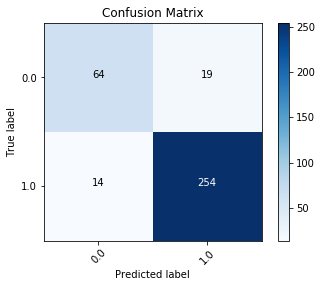

In [371]:
classifier = DecisionTreeClassifier(random_state=432)  
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test) 
     
display_accuracy(y_test, y_pred)

<Figure size 14400x576 with 0 Axes>

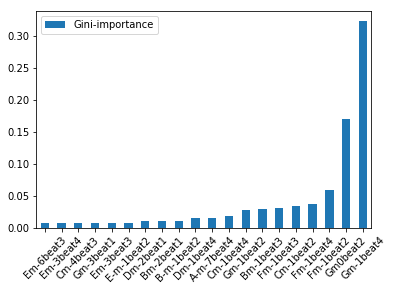

Gini-importance
Em-6beat3          0.007304
Em-3beat4          0.007388
Cm-4beat3          0.007453
Gm-3beat1          0.007680
Em-3beat3          0.008115
E-m-1beat2         0.008342
Dm-2beat1          0.011146
Bm-2beat1          0.011310
B-m-1beat2         0.011601
Dm-1beat4          0.015022
A-m-7beat4         0.016267
Cm-1beat4          0.018445
Gm-1beat2          0.028336
Bm-1beat3          0.029385
Fm-1beat3          0.031579
Cm-1beat2          0.033947
Fm-1beat4          0.037071
Fm-1beat2          0.059722
Gm0beat2           0.170463
Gm-1beat4          0.322804

In [372]:
display_feature_importance(X_train, classifier)

In [296]:
palestrina['Gm-1beat4'].sum()

41.0

In [286]:
palestrina = composer_df.loc[composer_df['composer']==1]
bach = composer_df.loc[composer_df['composer']==0]

In [287]:
class_weight = {0:3,
                1:1}

forest = RandomForestClassifier(random_state=35, n_estimators=1000, max_depth= 3,class_weight=class_weight)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
display_accuracy(y_test, y_pred)


# Modeling for Composer_df_2
Now that we have added in the columns for the chords in each measure, we can move to the next step of modeling

## Modeling with all features

In [494]:
target = 'composer'
features = list(composer_df_2.columns)
features.remove(target)
features.remove('slurs')
features.remove('C-m-5beat4')
features.remove('C-m-6beat2')
features.remove('C-m-2beat3')
features.remove('Gm0beat3')
features.remove('Em0beat3')
features.remove('Cm0beat3')

In [701]:
def get_chord_columns(df):
    """
        returns only the columns that represent chords by starting with V, v, I, i
    """
    all_cols = list(df.columns)
    chord_cols = [chord_col for chord_col in all_cols if col_is_chord(chord_col)]
    return chord_cols
                  

Accuracy is :91.16809116809117

AUC is :0.86

F1 Score is: 0.9429097605893187


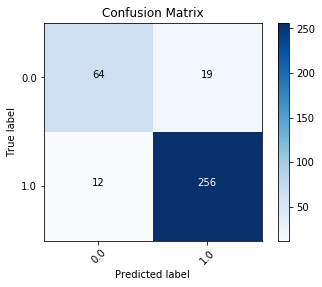

In [497]:
X = composer_df_2[features]
y = composer_df_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=234)

classifier2 = DecisionTreeClassifier(random_state=432)  
classifier2.fit(X_train, y_train) 
y_pred = classifier2.predict(X_test) 
     
display_accuracy(y_test, y_pred)

Accuracy is :86.32478632478633

AUC is :0.8

F1 Score is: 0.911439114391144


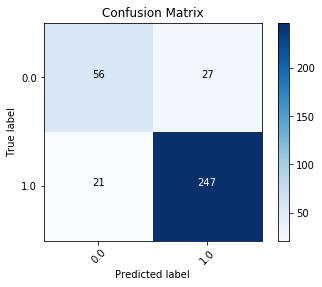

In [508]:
class_weight = {0:3,
                1:1}

forest = RandomForestClassifier(random_state=35, n_estimators=2000, max_depth= 5,class_weight=class_weight)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
display_accuracy(y_test, y_pred)

<Figure size 14400x576 with 0 Axes>

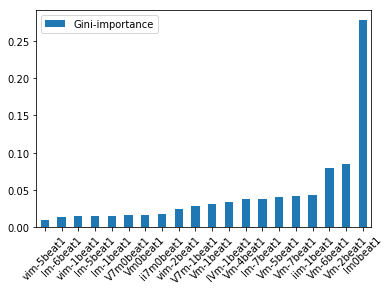

Gini-importance
vim-5beat1         0.010132
Im-6beat1          0.013815
vim-1beat1         0.014661
Im-5beat1          0.014790
Im-1beat1          0.015442
V7m0beat1          0.015740
Vm0beat1           0.016826
ii7m0beat1         0.018009
vim-2beat1         0.024944
V7m-1beat1         0.028472
Vm-1beat1          0.030822
IVm-1beat1         0.034270
Vm-4beat1          0.037435
Im-7beat1          0.037633
Vm-5beat1          0.040035
Vm-7beat1          0.041224
iim-1beat1         0.042538
Vm-6beat1          0.079604
Vm-2beat1          0.085133
Im0beat1           0.277570

In [509]:
display_feature_importance(X_train, forest)

## Modeling using only chords as features

In [543]:
chord_features = get_chord_columns(composer_df_2)

(1751, 485)

Accuracy is :83.47578347578347

AUC is :0.75

F1 Score is: 0.8933823529411765


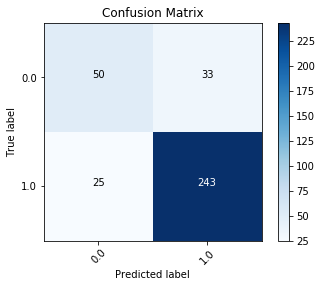

In [544]:
X = composer_df_2[chord_features]
y = composer_df_2[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=234)

classifier2 = DecisionTreeClassifier(random_state=432)  
classifier2.fit(X_train, y_train) 
y_pred = classifier2.predict(X_test) 
     
display_accuracy(y_test, y_pred)

<Figure size 14400x576 with 0 Axes>

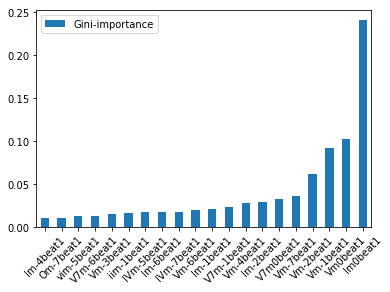

Gini-importance
Im-4beat1          0.010796
Om-7beat1          0.011149
vim-5beat1         0.013177
V7m-6beat1         0.013460
Vm-3beat1          0.015381
iim-1beat1         0.015943
IVm-5beat1         0.017301
Im-6beat1          0.017701
IVm-7beat1         0.017983
Vm-6beat1          0.019743
Im-1beat1          0.021280
V7m-1beat1         0.023861
Vm-4beat1          0.028312
Im-2beat1          0.029382
V7m0beat1          0.032666
Vm-7beat1          0.036431
Vm-2beat1          0.061320
Vm-1beat1          0.091880
Vm0beat1           0.103172
Im0beat1           0.241013

In [545]:
display_feature_importance(X_train, classifier2)

In [481]:
composer_df_2.to_csv()

',A-m-1beat1,A-m-1beat2,A-m-1beat3,A-m-1beat4,A-m-2beat1,A-m-2beat2,A-m-2beat3,A-m-2beat4,A-m-3beat1,A-m-3beat2,A-m-3beat3,A-m-3beat4,A-m-4beat1,A-m-4beat2,A-m-4beat3,A-m-4beat4,A-m-5beat1,A-m-5beat2,A-m-5beat3,A-m-5beat4,A-m-6beat1,A-m-6beat2,A-m-6beat3,A-m-6beat4,A-m-7beat1,A-m-7beat2,A-m-7beat3,A-m-7beat4,A-m0beat1,A-m0beat2,A-m0beat3,A-m0beat4,Am-1beat1,Am-1beat2,Am-1beat3,Am-1beat4,Am-2beat1,Am-2beat2,Am-2beat3,Am-2beat4,Am-3beat1,Am-3beat2,Am-3beat3,Am-3beat4,Am-4beat1,Am-4beat2,Am-4beat3,Am-4beat4,Am-5beat1,Am-5beat2,Am-5beat3,Am-5beat4,Am-6beat1,Am-6beat2,Am-6beat3,Am-6beat4,Am-7beat1,Am-7beat2,Am-7beat3,Am-7beat4,Am0beat1,Am0beat2,Am0beat3,Am0beat4,B-m-1beat1,B-m-1beat2,B-m-1beat3,B-m-1beat4,B-m-2beat1,B-m-2beat2,B-m-2beat3,B-m-2beat4,B-m-3beat1,B-m-3beat2,B-m-3beat3,B-m-3beat4,B-m-4beat1,B-m-4beat2,B-m-4beat3,B-m-4beat4,B-m-5beat1,B-m-5beat2,B-m-5beat3,B-m-5beat4,B-m-6beat1,B-m-6beat2,B-m-6beat3,B-m-6beat4,B-m-7beat1,B-m-7beat2,B-m-7beat3,B-m-7beat4,B-m0beat1,B-m0beat2,B-m0be

Accuracy is :87.46438746438746

AUC is :0.81

F1 Score is: 0.9194139194139195


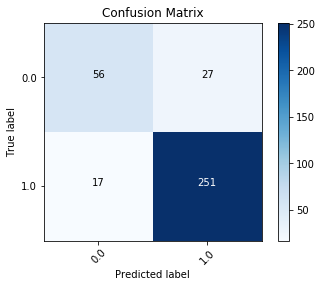

In [546]:
class_weight = {0:3,
                1:1}

forest = RandomForestClassifier(random_state=35, n_estimators=2000, max_depth=5, class_weight=class_weight)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
display_accuracy(y_test, y_pred)

<Figure size 14400x576 with 0 Axes>

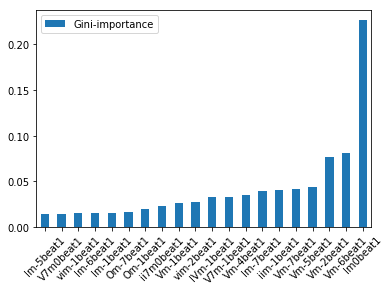

Gini-importance
Im-5beat1          0.014206
V7m0beat1          0.014394
vim-1beat1         0.015095
Im-6beat1          0.015320
Im-1beat1          0.015390
Om-7beat1          0.016827
Om-1beat1          0.019948
ii7m0beat1         0.022902
Vm-1beat1          0.026706
vim-2beat1         0.027381
IVm-1beat1         0.032547
V7m-1beat1         0.033165
Vm-4beat1          0.035275
Im-7beat1          0.039286
iim-1beat1         0.040969
Vm-7beat1          0.041303
Vm-5beat1          0.043922
Vm-2beat1          0.076300
Vm-6beat1          0.080800
Im0beat1           0.226402

In [547]:

display_feature_importance(X_train, forest)

<Figure size 14400x576 with 0 Axes>

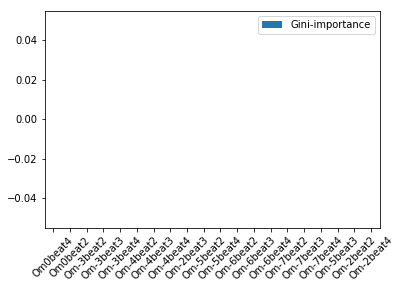

Gini-importance
Om0beat4               0.0
Om0beat2               0.0
Om-3beat2              0.0
Om-3beat3              0.0
Om-3beat4              0.0
Om-4beat2              0.0
Om-4beat3              0.0
Om-4beat4              0.0
Om-2beat3              0.0
Om-5beat2              0.0
Om-5beat4              0.0
Om-6beat2              0.0
Om-6beat3              0.0
Om-6beat4              0.0
Om-7beat2              0.0
Om-7beat3              0.0
Om-7beat4              0.0
Om-5beat3              0.0
Om-2beat2              0.0
Om-2beat4              0.0

In [548]:
display_feature_least_importance(X_train, forest)

In [549]:
useless_feats = get_features_with_0_importance(X_train, classifier)
feats2 = [feature for feature in features if feature not in useless_feats]

Accuracy is :94.01709401709401

AUC is :0.89

F1 Score is: 0.9616087751371115


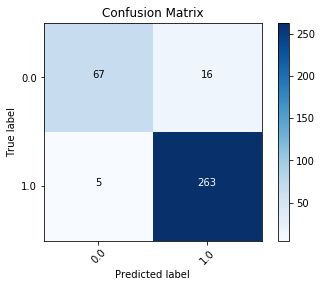

In [550]:
classifier3 = build_random_forest(composer_df_2, feats2, target)

<Figure size 14400x576 with 0 Axes>

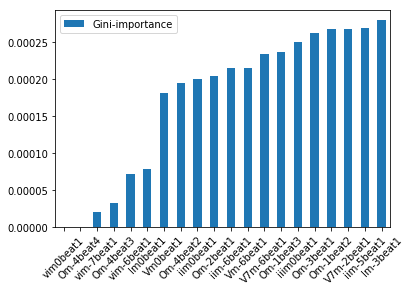

Gini-importance
vim0beat1          0.000000
Om-4beat4          0.000000
vim-7beat1         0.000021
Om-4beat3          0.000032
vim-6beat1         0.000071
Im0beat1           0.000078
Vm0beat1           0.000181
Om-4beat2          0.000194
iim0beat1          0.000200
Om-2beat1          0.000203
iim-6beat1         0.000214
Vm-6beat1          0.000214
V7m-6beat1         0.000233
Om-1beat3          0.000236
iiim0beat1         0.000250
Om-3beat1          0.000261
Om-1beat2          0.000266
V7m-2beat1         0.000267
iim-5beat1         0.000268
Im-3beat1          0.000279

In [551]:
display_feature_least_importance(X_train, classifier3)

# Building N-grams of chords

In [542]:
chord_columns = get_chord_columns(composer_df_2)
chord_columns

['IVm-1beat1',
 'IVm-2beat1',
 'IVm-3beat1',
 'IVm-4beat1',
 'IVm-5beat1',
 'IVm-6beat1',
 'IVm-7beat1',
 'IVm0beat1',
 'Im-1beat1',
 'Im-2beat1',
 'Im-3beat1',
 'Im-4beat1',
 'Im-5beat1',
 'Im-6beat1',
 'Im-7beat1',
 'Im0beat1',
 'Om-1beat1',
 'Om-1beat2',
 'Om-1beat3',
 'Om-1beat4',
 'Om-2beat1',
 'Om-2beat2',
 'Om-2beat3',
 'Om-2beat4',
 'Om-3beat1',
 'Om-3beat2',
 'Om-3beat3',
 'Om-3beat4',
 'Om-4beat1',
 'Om-4beat2',
 'Om-4beat3',
 'Om-4beat4',
 'Om-5beat1',
 'Om-5beat2',
 'Om-5beat3',
 'Om-5beat4',
 'Om-6beat1',
 'Om-6beat2',
 'Om-6beat3',
 'Om-6beat4',
 'Om-7beat1',
 'Om-7beat2',
 'Om-7beat3',
 'Om-7beat4',
 'Om0beat1',
 'Om0beat2',
 'Om0beat3',
 'Om0beat4',
 'V7m-1beat1',
 'V7m-2beat1',
 'V7m-3beat1',
 'V7m-4beat1',
 'V7m-5beat1',
 'V7m-6beat1',
 'V7m-7beat1',
 'V7m0beat1',
 'Vm-1beat1',
 'Vm-2beat1',
 'Vm-3beat1',
 'Vm-4beat1',
 'Vm-5beat1',
 'Vm-6beat1',
 'Vm-7beat1',
 'Vm0beat1',
 'ii7m-1beat1',
 'ii7m-2beat1',
 'ii7m-3beat1',
 'ii7m-4beat1',
 'ii7m-5beat1',
 'ii7m-6beat1',


In [560]:
def build_all_bigram_permutations():
    chord_names = ['vi', 'V', 'ii', 'O', 'I', 'iii', 'IV', 'V7']
    all_bigrams = []
    for i in range(len(chord_names)):
        for j in range(len(chord_names)):
            if i != j:
                all_bigrams.append(chord_names[i]+'--'+chord_names[j]+'_count')
    return all_bigrams
        
    
build_all_bigram_permutations()    

['vi--V_count',
 'vi--ii_count',
 'vi--O_count',
 'vi--I_count',
 'vi--iii_count',
 'vi--IV_count',
 'vi--V7_count',
 'V--vi_count',
 'V--ii_count',
 'V--O_count',
 'V--I_count',
 'V--iii_count',
 'V--IV_count',
 'V--V7_count',
 'ii--vi_count',
 'ii--V_count',
 'ii--O_count',
 'ii--I_count',
 'ii--iii_count',
 'ii--IV_count',
 'ii--V7_count',
 'O--vi_count',
 'O--V_count',
 'O--ii_count',
 'O--I_count',
 'O--iii_count',
 'O--IV_count',
 'O--V7_count',
 'I--vi_count',
 'I--V_count',
 'I--ii_count',
 'I--O_count',
 'I--iii_count',
 'I--IV_count',
 'I--V7_count',
 'iii--vi_count',
 'iii--V_count',
 'iii--ii_count',
 'iii--O_count',
 'iii--I_count',
 'iii--IV_count',
 'iii--V7_count',
 'IV--vi_count',
 'IV--V_count',
 'IV--ii_count',
 'IV--O_count',
 'IV--I_count',
 'IV--iii_count',
 'IV--V7_count',
 'V7--vi_count',
 'V7--V_count',
 'V7--ii_count',
 'V7--O_count',
 'V7--I_count',
 'V7--iii_count',
 'V7--IV_count']

In [562]:
test_df = composer_df_2.copy(deep=True)
test_df

A-m-1beat1  A-m-1beat2  A-m-1beat3  A-m-1beat4  A-m-2beat1  A-m-2beat2  \
0            0.0         0.0         0.0         0.0         0.0         0.0   
1            1.0         0.0         0.0         0.0         1.0         0.0   
2            1.0         0.0         1.0         0.0         1.0         0.0   
3            1.0         0.0         1.0         1.0         1.0         0.0   
4            0.0         1.0         1.0         0.0         0.0         0.0   
5            0.0         0.0         0.0         0.0         0.0         0.0   
6            1.0         1.0         0.0         0.0         0.0         0.0   
7            0.0         0.0         0.0         0.0         0.0         0.0   
8            0.0         0.0         0.0         0.0         0.0         0.0   
9            0.0         0.0         0.0         0.0         0.0         1.0   
10           0.0         0.0         1.0         0.0         0.0         0.0   
11           0.0         0.0         1.0         0.0         0.0         0.0   
12           1.0         1.0         0.0         0.0         0.0         0.0   
13           0.0         0.0         0.0         1.0         0.0         0.0   
14           0.0         0.0         0.0         0.0         0.0         0.0   
15           0.0         0.0         0.0         0.0         0.0         0.0   
16           0.0         0.0         0.0         0.0         0.0         0.0   
17           0.0         0.0         0.0         0.0         0.0         0.0   
18           0.0         0.0         0.0         0.0         0.0         0.0   
19           0.0         0.0         0.0         0.0         0.0         0.0   
20           0.0         0.0         0.0         0.0         0.0         0.0   
21           0.0         0.0         0.0         0.0         0.0         0.0   
22           1.0         0.0         0.0         0.0         0.0         0.0   
23           1.0         0.0         0.0         0.0         0.0         0.0   
24           0.0         0.0         0.0         0.0         0.0         1.0   
25           0.0         1.0         0.0         0.0         1.0         1.0   
26           0.0         1.0         0.0         0.0         1.0         1.0   
27           0.0         0.0         0.0         0.0         0.0         0.0   
28           0.0         0.0         0.0         0.0         0.0         0.0   
29           0.0         0.0         0.0         0.0         0.0         0.0   
...          ...         ...         ...         ...         ...         ...   
1721         0.0         0.0         0.0         0.0         1.0         0.0   
1722         0.0         0.0         0.0         0.0         0.0         0.0   
1723         0.0         0.0         0.0         0.0         0.0         0.0   
1724         0.0         0.0         0.0         0.0         0.0         0.0   
1725         0.0         0.0         0.0         0.0         0.0         0.0   
1726         0.0         0.0         0.0         0.0         0.0         0.0   
1727         0.0         0.0         0.0         0.0         0.0         0.0   
1728         0.0         0.0         1.0         0.0         0.0         0.0   
1729         0.0         0.0         0.0         0.0         0.0         0.0   
1730         0.0         0.0         0.0         0.0         0.0         0.0   
1731         0.0         0.0         1.0         0.0         0.0         1.0   
1732         1.0         0.0         0.0         0.0         0.0         0.0   
1733         1.0         0.0         1.0         0.0         1.0         0.0   
1734         0.0         0.0         0.0         0.0         0.0         0.0   
1735         0.0         0.0         0.0         0.0         1.0         0.0   
1736         1.0         0.0         1.0         0.0         1.0         0.0   
1737         0.0         0.0         0.0         0.0         0.0         0.0   
1738         0.0         0.0         0.0         0.0         0.0         0.0   
1739  

In [570]:
def add_bigram_chord_cols(df):
    bigram_columns = build_all_bigram_permutations()
    return df.reindex(columns=bigram_columns).fillna(0)

In [566]:
def fill_in_bigram_counts(df):
    chord_columns = get_chord_columns(df)
    chord_df = df[chord_columns]
    return chord_df.head()

In [567]:
fill_in_bigram_counts(test_df)

IVm-1beat1  IVm-2beat1  IVm-3beat1  IVm-4beat1  IVm-5beat1  IVm-6beat1  \
0         0.0         0.0         0.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         1.0         0.0   
2         0.0         0.0         0.0         1.0         0.0         1.0   
3         0.0         0.0         0.0         1.0         0.0         1.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   IVm-7beat1  IVm0beat1  Im-1beat1  Im-2beat1  ...  iim-7beat1  iim0beat1  \
0         0.0        0.0        0.0        1.0  ...         0.0        0.0   
1         0.0        0.0        0.0        0.0  ...         0.0        0.0   
2         0.0        0.0        0.0        1.0  ...         0.0        0.0   
3         0.0        0.0        0.0        1.0  ...         1.0        0.0   
4         1.0        0.0        0.0        0.0  ...         0.0        0.0   

   vim-1beat1  vim-2beat1  vim-3beat1  vim-4beat1  vim-5beat1  vim-6beat1  \
0         0.0         1.0         1.0         0.0         0.0         0.0   
1         0.0         0.0         0.0         0.0         0.0         0.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         0.0         0.0         0.0         0.0         0.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   vim-7beat1  vim0beat1  
0         0.0        0.0  
1         0.0        0.0  
2         0.0        0.0  
3         0.0        0.0  
4         0.0        0.0  

[5 rows x 96 columns]

In [573]:
dec_tree_classifier4 = build_decision_tree(composer_df_2, features, target)

ValueError: Number of features of the model must match the input. Model n_features is 96 and input n_features is 477 

## Graphing Decision Tree

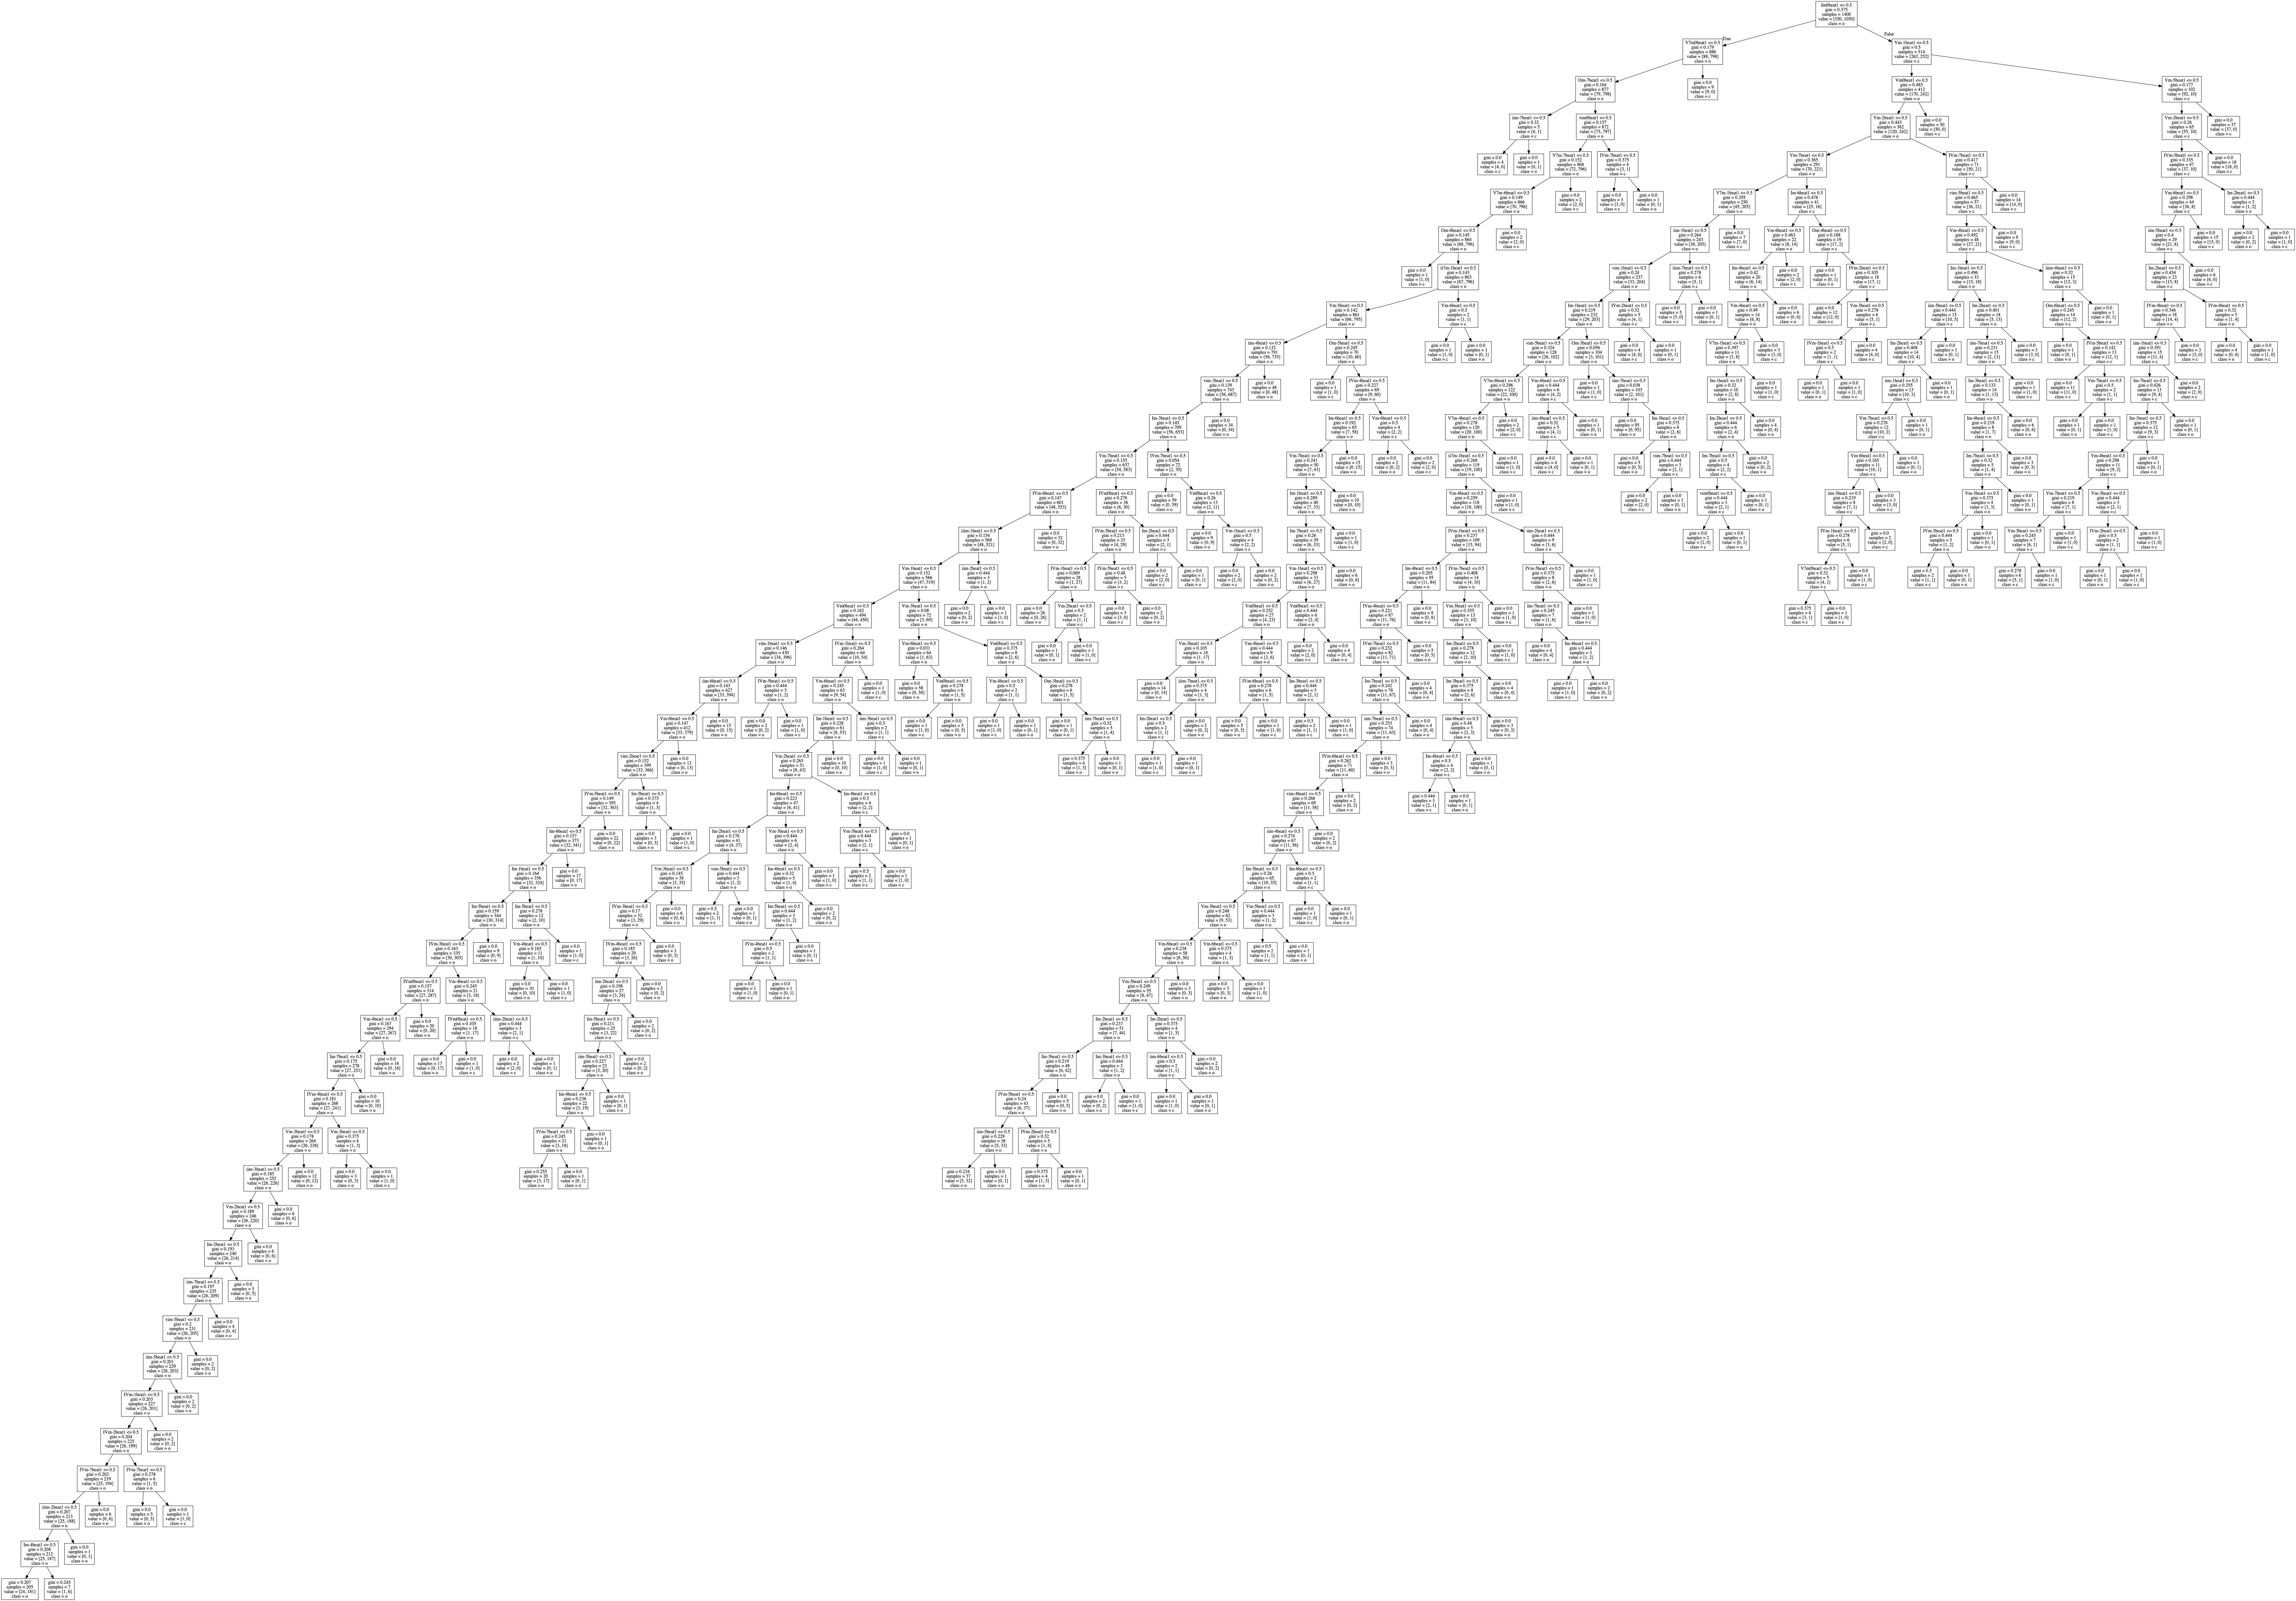

In [574]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from graphviz import Graph
# Create DOT data
dot_data = export_graphviz(classifier2, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=target)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


## Modeling Major vs. Minor

In [668]:
def is_minor(chords_of_last_measure:list):
    for chord in chords_of_last_measure:
        
        #if any of the chords in the last measure are a minor, then we can assume the
        # whole piece was in minor
        if chord.lower().startswith('a'):
            return True
    return False

def is_v(chord):
    return str(chord).lower().startswith('v')

def is_i(chord):
    return str(chord).lower().startswith('i')

def is_o(chord):
    return str(chord).lower().startswith('o')

def is_vi(chord):
    return str(chord).lower().startswith('vi')

def col_is_chord(column):
    return is_v(column) or is_i(column) or is_o(column) 

def get_columns_of_last_measure_chords(row):
    columns = list(row.axes[0])
    last_measure_cols = []
    for column in columns:
        if 'm0' in column:
            if col_is_chord(column):
                last_measure_cols.append(column)
    return last_measure_cols

def get_minor_col_from_last_measure(row):
    columns = list(row.axes[0])
    last_minor_cols = []
    for column in columns:
        if 'm0' in column or 'm-1':
            if column.startswith('vi'):
                last_minor_cols.append(column)

    return last_minor_cols

def add_major_minor(row):
    """
        adds a major/minor column based on whether any of the chords in the last measure
        of the piece contain an A-minor chord
        
        Params: the DataFrame to apply
        Returns: Same dataframe with 0 and 1 added for major
    """

    cols_for_last_meas = get_minor_col_from_last_measure(row)
    for column in cols_for_last_meas:
        if row[column]==1:
            row['minor'] = 1
            return row
    row['minor'] = 0
    return row
            


In [669]:
subset.apply(add_major_minor, axis=1)

A-m-1beat1  A-m-1beat2  A-m-1beat3  A-m-1beat4  A-m-2beat1  A-m-2beat2  \
0          0.0         0.0         0.0         0.0         0.0         0.0   
1          1.0         0.0         0.0         0.0         1.0         0.0   
2          1.0         0.0         1.0         0.0         1.0         0.0   
3          1.0         0.0         1.0         1.0         1.0         0.0   
4          0.0         1.0         1.0         0.0         0.0         0.0   
5          0.0         0.0         0.0         0.0         0.0         0.0   
6          1.0         1.0         0.0         0.0         0.0         0.0   
7          0.0         0.0         0.0         0.0         0.0         0.0   
8          0.0         0.0         0.0         0.0         0.0         0.0   
9          0.0         0.0         0.0         0.0         0.0         1.0   
10         0.0         0.0         1.0         0.0         0.0         0.0   
11         0.0         0.0         1.0         0.0         0.0         0.0   
12         1.0         1.0         0.0         0.0         0.0         0.0   
13         0.0         0.0         0.0         1.0         0.0         0.0   
14         0.0         0.0         0.0         0.0         0.0         0.0   

    A-m-2beat3  A-m-2beat4  A-m-3beat1  A-m-3beat2  ...  slurs  vim-1beat1  \
0          0.0         0.0         0.0         0.0  ...    0.0         0.0   
1          1.0         0.0         0.0         0.0  ...    0.0         0.0   
2          0.0         0.0         0.0         0.0  ...    0.0         0.0   
3          0.0         0.0         0.0         0.0  ...    0.0         0.0   
4          0.0         0.0         0.0         1.0  ...    0.0         0.0   
5          0.0         0.0         0.0         0.0  ...    0.0         1.0   
6          0.0         0.0         0.0         0.0  ...    0.0         0.0   
7          0.0         0.0         0.0         0.0  ...    0.0         0.0   
8          0.0         0.0         0.0         0.0  ...    0.0         0.0   
9          0.0         0.0         0.0         0.0  ...    0.0         0.0   
10         1.0         0.0         0.0         0.0  ...    0.0         0.0   
11         1.0         0.0         0.0         0.0  ...    0.0         0.0   
12         0.0         0.0         0.0         0.0  ...    0.0         0.0   
13         0.0         0.0         1.0         1.0  ...    0.0         0.0   
14         0.0         0.0         0.0         0.0  ...    0.0         0.0   

    vim-2beat1  vim-3beat1  vim-4beat1  vim-5beat1  vim-6beat1  vim-7beat1  \
0          1.0         1.0         0.0         0.0         0.0         0.0   
1          0.0         0.0         0.0         0.0         0.0         0.0   
2          0.0         0.0         0.0         0.0         0.0         0.0   
3          0.0         0.0         0.0         0.0         0.0         0.0   
4          0.0         0.0         0.0         0.0         0.0         0.0   
5          0.0         0.0         0.0         0.0         0.0         1.0   
6          0.0         0.0         0.0         0.0         0.0         0.0   
7          0.0         0.0         0.0         1.0         0.0         0.0   
8          0.0         0.0         0.0         0.0         0.0         0.0   
9          0.0         0.0         0.0         0.0         0.0         0.0   
10         1.0         0.0         0.0         0.0         0.0         0.0   
11         1.0         0.0         0.0         0.0         1.0         0.0   
12         0.0         0.0         0.0         0.0         0.0         0.0   
13         0.0         0.0         0.0         0.0         0.0         0.0   
14         0.0         0.0         0.0         0.0         0.0         0.0   

    vim0beat1  minor  
0         0.0    1.0  
1         0.0    0.0  
2         0.0    0.0  
3         0.0    0.0  
4         0.0    0.0  
5         0.0    1.0  
6         0.0    0.0  
7         0.0    1.0  
8         0.0    0.0  
9         0.0    0.0  
10  

In [640]:
comp_df_copy = composer_df_2.copy(deep=True)

In [671]:
comp_df_copy = comp_df_copy.apply(add_major_minor, axis=1)

In [648]:
subset = comp_df_copy[:15]


In [672]:
comp_df_copy.minor.sum()

450.0

In [679]:
minor_df = comp_df_copy.loc[comp_df_copy['minor']==1]
major_df = comp_df_copy.loc[comp_df_copy['minor']==0]

## Modeling just the Minor and Major versions of the DataFrames

Accuracy is :94.44444444444444

AUC is :0.94

F1 Score is: 0.9523809523809523


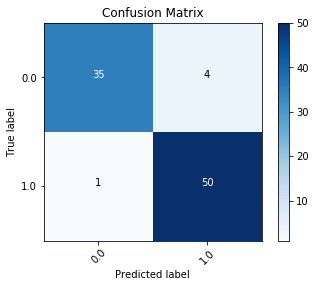

In [697]:
features_minor = list(minor_df.columns)
features_minor.remove('composer')
minor_classifier, X_train_minor = build_random_forest(minor_df, features_minor, target)

<Figure size 14400x576 with 0 Axes>

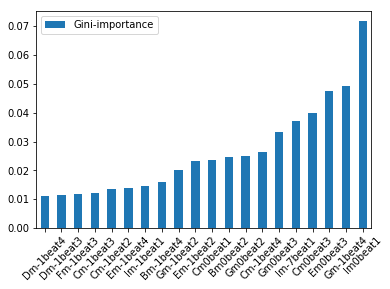

Gini-importance
Dm-1beat4         0.010968
Dm-1beat3         0.011561
Fm-1beat3         0.011850
Cm-1beat3         0.012030
Cm-1beat2         0.013620
Em-1beat4         0.014036
Im-1beat1         0.014735
Bm-1beat4         0.015885
Gm-1beat2         0.020180
Em-1beat2         0.023094
Cm0beat1          0.023667
Bm0beat2          0.024777
Gm0beat2          0.025051
Cm-1beat4         0.026333
Gm0beat3          0.033284
Im-7beat1         0.037085
Cm0beat3          0.039759
Em0beat3          0.047401
Gm-1beat4         0.049406
Im0beat1          0.071866

In [698]:
display_feature_importance(X_train_minor, minor_classifier)

Accuracy is :93.10344827586206

AUC is :0.83

F1 Score is: 0.9594594594594595


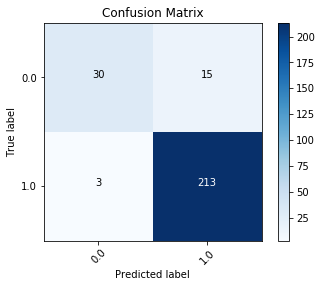

In [692]:
major_classifier, X_train_major = build_random_forest(major_df, features_minor, target)

<Figure size 14400x576 with 0 Axes>

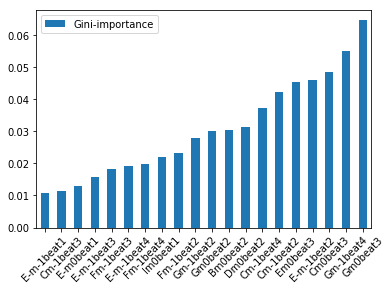

Gini-importance
E-m-1beat1         0.010686
Cm-1beat3          0.011388
E-m0beat1          0.013057
E-m-1beat3         0.015717
Fm-1beat3          0.018185
E-m-1beat4         0.019296
Fm-1beat4          0.019680
Im0beat1           0.021846
Fm-1beat2          0.023349
Gm-1beat2          0.027984
Gm0beat2           0.030080
Bm0beat2           0.030286
Dm0beat2           0.031206
Cm-1beat4          0.037171
Cm-1beat2          0.042356
Em0beat3           0.045344
E-m-1beat2         0.045910
Cm0beat3           0.048458
Gm-1beat4          0.054938
Gm0beat3           0.064501

In [700]:
display_feature_importance(X_train_major, major_classifier)

## Conclusions
In the major classifier, the note placement was what had the greatest influence in determining the difference between the two composers. 

In the minor however, there was a much higher presence of chords being important features between the two. 4/15 for the minor, whereas 1/15 for the major, and that one only had a feature Gini-importance of .02, whereas for the minor it was even the most influential feature.

Therefore, we can conclude that these two composers, when writing the minor key, how they treated harmony separated them more than the way they wrote their notes. 

<Figure size 14400x576 with 0 Axes>

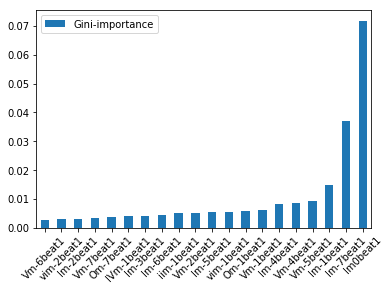

Gini-importance
Im-5beat1          0.005445
vim-1beat1         0.005466
Om-1beat1          0.005942
Vm-1beat1          0.006131
Im-4beat1          0.008078
Vm-4beat1          0.008513
Vm-5beat1          0.009158
Im-1beat1          0.014735
Im-7beat1          0.037085
Im0beat1           0.071866

In [708]:
display_only_chord_importance(X_train_minor, minor_classifier)